In [28]:
#import stuff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

In [29]:
#get data
df = pd.read_csv("AnimeList.csv") #fill this in with the csv name

df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [37]:
#cleaning the dataframe
df = df[df["type"] == "TV"]
df = df[df["episodes"] <= 50]
df = df[df["episodes"] >= 10]

With that figured out, let's get our dataframe ready

In [38]:
all_lineups = "Boku no Hero Academia, Little Witch Academia, Lucky☆Star, Konosuba, Overlord, Isekai Shokudo, Jojo no Kimyou na Bouken 3: Stardust Crusaders 2nd Season, Yuri on Ice, Sakamoto desu ga?, Hokuto no Ken, Initial D First Stage, Darker than Black: Kuro no Keiyakusha, Shingeki no Bahamut: Genesis, Ore Monogatari, Gakkou Gurashi, Nichijou, Spice and Wolf, Jojo no Kimyou na Bouken Part 3: Stardust Crusaders, Owari no Seraph, Nanbaka , Mob Psycho 100, Kobayashi-san Chi no Maid Dragon, Arakawa Under the Bridge, Fate/kaleid liner Prisma☆Illya, Fate/stay night: Unlimited Blade Works, Ansatsu Kyoushitsu, Death Parade, Hibike! Euphonium, Hyouka, Sailor♥Danshi, Uchouten Kazoku, Noragami, One Punch Man, Free!, Kekkai Sensen, Dagashi Kashi, Kotoura-san, Boku dake ga Inai Machi, Kamisama Hajimemashita, Gin no Saji, Fate/Zero , Mikakunin de Shinkoukei, Bokura wa Minna Kawaisou, Chuunibyou demo Koi ga Shitai!, Log Horizon, Gekkan Shoujou Nozaki-kun, Amagi Brilliant Park, Gugure! Kokkuri-san, Persona 4 the Golden Animation, Mekaku City Actors, Boku wa Tomodachi ga Sukunai, No Game No Life, Hataraku Maou-sama!, Fate/stay night, Cuticle Tantei, Shingeki no Kyojin, Psycho-Pass, Wagaya no Oinari-sama, Devil Survivor 2 The Animation, C-Control, Nichibros, Kyoukai no Kanata, Jinrui wa Suitai Shimashita, Danganronpa, Un Go, Senhime Zesshou Symphogear G, WataMote, Cromartie High School, Acchi Kochi, Cardcaptor Sakura, Another, Persona 4, Jormungand, Kamisama no Memo Chou, Sword Art Online, Binbougami ga, Mirrai Nikki, Ano Hana, Hellsing, Maoyuu Maou Yuusha, Pandora Hearts, Deadman Wonderland, Blood-C, Ao No Exorcist, Kuragehime, G-Gundam, Genshiken, Steins;Gate, No. 6, Tiger & Bunny, Symphogear, Madoka, Ben-to, Baccano!, Neon Genesis Evangelion, Samurai Champloo, Black Lagoon, Cowboy Bebop, Zankyou no Terror, Hachimitsu to Clover II, Bakumatsu Rock, Medaka Box, Hachimitsu to Clover, Tokyo Ghoul, Haiyore! Nyaruko-san!, Akuma no Riddle, Servant X Service, Hai to Gensou no Grimgar, Megalo Box, Occultic;Nine, Hataraku Maou-Sama, Cuticle Tanei Inaba, Ping Pong the Animation, Joshiraku, Watashi ni Tenshi ga Maiorita!, Space☆Dandy, Code Geass: Hangyaku no Lelouch, Maoujou de Oyasumi, Denki-gai no Honya-san, Asobi Asobase, 91 Days (TV), Shoujo Shuumastu Ryokou, Danshi Koukousei no Nichijou, Irozuku Sekai no Ashita kara, Azumanga Daioh, Gankutsuou: The Count of Monte Cristo, Yuru Yuri♪♪, Baccano, Kimi ni Todoke, Grand Blue, Jojo no Kimyou na Bouken Part 4: Diamond is Unbreakable, Youjo Senki, Made in Abyss, Overlord II, Mahoutsukai no Yome, Seishun Buta Yarou wa Bunny girl Senpai no Yume wo Minai, Mitsuboshi Colors"
lineup_list = all_lineups.split(", ")
print(len(lineup_list))

137


In [39]:
#list comprehend 
in_lineup =[]
for i in df["title"]:
    if i in lineup_list:
        in_lineup.append(True)
    else:
        in_lineup.append(False)

In [40]:
#add in_lineup to df
se = pd.Series(in_lineup)
df["in_lineup"] = se.values
print(df["in_lineup"].values.sum())

83


<AxesSubplot:xlabel='score', ylabel='Count'>

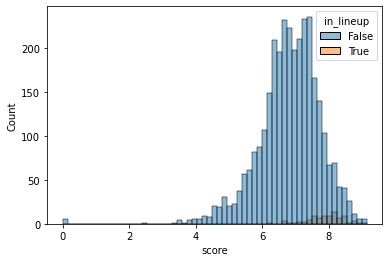

In [48]:
#visualize the model

sns.histplot(
    data = df,
    x="score", hue="in_lineup"
)

In [35]:
#set up model
clf = tree.DecisionTreeClassifier()

In [36]:
#decision tree stuff
